# The Big Picture and Framing the Problem
This dataset comes from the Kaggle House Prices - Advanced Regression Techniques competition. The goal is to build a predictive model that is able to predict the sale price of houses in Ames, Iowa, based on a variety of (numerical and categorical) features that describe many aspects of a residential home. 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

# Data Collection

In [1]:
import os
import pandas as pd

In [2]:
file_path = os.getcwd()

train_data = os.path.join(file_path, 'kaggle_housing/train.csv' )
train_df = pd.read_csv(train_data)

test_data = os.path.join(file_path, 'kaggle_housing/test.csv')
test_df = pd.read_csv(test_data)

# Data Exploration

## Types of Data

In [3]:
import numpy as np

In [4]:
# Size of the Datasets - This is a fairly small dataset with only 1460 examples, 80 features, and 1 target variable
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [5]:
# Let's see what the data looks like - It's structured with many different numerical and categorical data types 
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
# We can look at each of the columns/features, the number of non-null entries, and their data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# It's clear there is missing data - Let's see how many values are missing and from which features
train_df.isnull().sum()[(train_df.isnull().sum() > 0) == True].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [8]:
# It might help to look proportionally at how many values are missing 
prop_missing = train_df.isnull().sum()[(train_df.isnull().sum() > 0) == True] / train_df.shape[0]
prop_missing.sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

Some of these features appear to be missing almost all of their values. However, reading through what each feature and it's classes represent in the data_description.txt, it's clear that NA was used to represent something being missing from the class. Pandas interpreted this to mean that the data itself was missing (NaN). So let's go ahead and convert these values to be "NO" rather than "NA". 

In [9]:
# These are the features that we know use NA, so I will only convert NaN values for them
# This still makes an assumption that any NaN value in these features was actually NA and not in fact missing
NA_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
              'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for feature in NA_features:
    train_df[feature] = train_df[feature].replace({np.nan: 'NO'})
for feature in NA_features:
    test_df[feature] = test_df[feature].replace({np.nan: 'NO'})

In [10]:
# Now we can see that there are far fewer missing values 
train_df.isnull().sum()[(train_df.isnull().sum() > 0) == True].sort_values(ascending=False)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64

In [11]:
test_df.isnull().sum()[(test_df.isnull().sum() > 0) == True].sort_values(ascending=False)

LotFrontage     227
GarageYrBlt      78
MasVnrType       16
MasVnrArea       15
MSZoning          4
Functional        2
Utilities         2
BsmtHalfBath      2
BsmtFullBath      2
Exterior1st       1
Exterior2nd       1
SaleType          1
BsmtFinSF1        1
BsmtFinSF2        1
GarageArea        1
TotalBsmtSF       1
KitchenQual       1
GarageCars        1
BsmtUnfSF         1
dtype: int64

In [12]:
# Check for duplicates
train_df.duplicated().sum()

0

In [13]:
# Get a sense for the values in each feature
for col in train_df.columns:
    print(col)
    print(train_df[col].value_counts())
    print("\n-----------\n")

Id
1460    1
479     1
481     1
482     1
483     1
       ..
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64

-----------

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

-----------

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

-----------

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

-----------

LotArea
7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64

-----------

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

-----------


### Immediate Notes and Concerns

There are many classes that only have a few instances. Unfortunately, this will make it impossible or difficult for the model to learn patterns about them. 

We also need to handle some numerical variables that should be categorical, as well as categorical variables that can be represented as numerical. 

#### Id
A unique identifier for each house, therefore it does nothing for a model and can be removed. However, we need to save the Test IDs for the submission. 

In [14]:
train_id = train_df.pop('Id')
test_id = test_df.pop('Id')

In [15]:
train_df.shape, test_df.shape

((1460, 80), (1459, 79))

#### MSSubClass
This variable is being treated as a numerical feature, but in the description of the data it appears to be categorical. Therefore, it will need to be converted. 

In [16]:
for df in [train_df, test_df]:
    df['MSSubClass'] = df['MSSubClass'].map({20:'20', 30:'30', 40:'40', 45:'45', 50:'50', 60:'60',
                                            70:'70', 75:'75', 80:'80', 85:'85', 90:'90', 120:'120',
                                            150:'150', 160:'160', 180:'180', 190:'190'})

#### YrSold
There are only five years in which a house was sold in this dataset. More importantly, a house sold more recently doesn't necessarily mean that it sold for more, particularly since there was a housing market crash in 2008. Therefore, it would make sense to convert YrSold to a categorical variable. 

In [17]:
train_df[['YrSold', 'SalePrice']].groupby(['YrSold']).mean()

,SalePrice
YrSold,
2006,182549.458599
2007,186063.151976
2008,177360.838816
2009,179432.103550
2010,177393.674286


In [18]:
for df in [train_df, test_df]:
    df['YrSold'] = df['YrSold'].map({2006:'2006', 2007:'2007', 2008:'2008', 2009:'2009', 2010:'2010'})

#### MoSold
There's no reason to believe that a higher numbered or lower numbered month would equate to a higher or lower sale price. Therefore, this feature should also be categorical. However, months seem a bit arbitrary of a cutoff for how high a house would sell for. Instead, I'll group it into seasons.

In [19]:
for df in [train_df, test_df]:
    df['SeasonSold'] = df['MoSold'].map({1:'Winter', 2: 'Winter', 3:'Winter', 4:'Spring', 5:'Spring', 6:'Spring',
                                            7:'Summer', 8:'Summer', 9:'Summer', 10:'Fall', 11:'Fall', 12:'Fall'})
    df.drop(columns='MoSold', inplace=True)

In [20]:
train_df[['SeasonSold', 'SalePrice']].groupby(['SeasonSold']).mean()

,SalePrice
SeasonSold,
Fall,185773.017621
Spring,174270.508361
Summer,187248.362768
Winter,181961.310185


#### Encoding Categorical Variables - Ordinal
The next step is to look at descriptive statistics, however this cannot be done with categorical variables. Therefore we will create encoded versions of each categorical variable. These may also end up being useful in the final model. 

Some of these categorical variables could easily be represented as ordinal numerical features - like ExterQual. This is because there is a built in sense for the order and distance between the classes. So for these variables we will encode them and get rid of the original categorical versions. 

In [21]:
score_categories = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']
for df in [train_df, test_df]:
    for feature in score_categories:
        df[feature+'_E'] = df[feature].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})

In [22]:
# Let's create a separate binary feature to account for features with a 'NO' class
for df in [train_df, test_df]:
    df['Basement'] = df['BsmtQual'] != 'NO'
    df['Garage'] = df['GarageQual'] != 'NO'
    df['Fireplace'] = df['FireplaceQu'] != 'NO'
    df['Pool'] = df['PoolQC'] != 'NO'

In [23]:
score_no_categories = ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']
for df in [train_df, test_df]:
    for feature in score_no_categories:
        df[feature+'_E'] = df[feature].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NO':0})

In [24]:
for df in [train_df, test_df]:
        df['BsmtExposure'+'_E'] = df['BsmtExposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NO':0})
        df['GarageFinish'+'_E'] = df['GarageFinish'].map({'Fin':3, 'RFn':2, 'Unf':1, 'NO':0})
        df['PoolQC'+'_E'] = df['PoolQC'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NO':0})

In [25]:
for df in [train_df, test_df]:
    df.drop(columns=['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'BsmtQual', 'BsmtCond', 'FireplaceQu', 
                     'GarageQual', 'GarageCond', 'BsmtExposure','GarageFinish', 'PoolQC'], inplace=True)

#### Encoding Categorical Variables - Nominal
Now we can make encoded versions of the rest of the categorical variables. Because there is no inherent order or distance between the classes in these variables, we will order them by the mean SalePrice of each class. This will give a sense for the order based on our data, but it will not give a sense of the distance between each class. 

In [26]:
categorical_features = train_df.select_dtypes(include=['category', 'object']).columns
categorical_features

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical',
       'Functional', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature',
       'YrSold', 'SaleType', 'SaleCondition', 'SeasonSold'],
      dtype='object')

In [27]:
for feature in categorical_features:
    classes_by_saleprice = train_df[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    classes_by_saleprice = classes_by_saleprice.sort_values()
    ordinal_mapping = pd.Series(range(1, len(classes_by_saleprice)+1), 
                                    index=classes_by_saleprice.index).to_dict()
    train_df[feature+'_E'] = train_df[feature].map(ordinal_mapping).astype('float16')
    test_df[feature+'_E'] = test_df[feature].map(ordinal_mapping).astype('float16')

In [28]:
train_df.shape, test_df.shape

((1460, 118), (1459, 117))

## Descriptive Statistics

We already looked at the measures of frequency with the above value counts and the missing value counts. 

We can also look at the measures of central tendency and spread for numerical features (including the encoded categorical features). The only value that could be obtained for categorical data is the mode, which we already got in the above value counts. 

In [29]:
# Look at measures of shape - skew
from scipy.stats import skew

In [30]:
# Hard to say much with this, we'll need to look at visualizations and narrow down to features that correlate 
# highly with the SalePrice
train_df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Electrical_E,Functional_E,GarageType_E,PavedDrive_E,Fence_E,MiscFeature_E,YrSold_E,SaleType_E,SaleCondition_E,SeasonSold_E
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1459.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,4.890625,6.789062,4.941406,2.855469,4.601562,3.929688,3.128906,5.285156,4.832031,2.320312
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,0.394775,0.841797,1.686523,0.496582,0.875977,0.378906,1.432617,1.189453,0.887695,1.269531
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,5.000000,7.000000,3.000000,3.000000,5.000000,4.000000,2.000000,5.000000,5.000000,1.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,5.000000,7.000000,6.000000,3.000000,5.000000,4.000000,3.000000,5.000000,5.000000,2.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,5.000000,7.000000,6.000000,3.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,5.000000,7.000000,7.000000,3.000000,5.000000,5.000000,5.000000,9.000000,6.000000,4.000000


In [31]:
# We can look at the correlation measure of dependence for numerical features
# Spearman correlation is better when there may be a nonlinear relationship between the variables
train_df.corr(method='spearman')

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Electrical_E,Functional_E,GarageType_E,PavedDrive_E,Fence_E,MiscFeature_E,YrSold_E,SaleType_E,SaleCondition_E,SeasonSold_E
LotFrontage,1.000000,0.649633,0.254952,-0.083242,0.194510,0.116772,0.258906,0.154014,0.052516,0.119436,...,0.097264,0.028349,0.358194,0.149020,-0.054277,-0.014326,0.030309,0.108793,0.113366,0.033930
LotArea,0.649633,1.000000,0.233303,-0.046912,0.103385,0.075158,0.177539,0.171995,0.072019,0.077830,...,0.080962,-0.040685,0.313989,0.067289,0.039252,-0.049922,0.015596,0.069633,0.081265,0.054332
OverallQual,0.254952,0.233303,1.000000,-0.177521,0.647392,0.557723,0.413500,0.132957,-0.117560,0.272939,...,0.248208,0.176720,0.501654,0.226607,0.217897,0.102124,0.014350,0.302645,0.292745,0.057410
OverallCond,-0.083242,-0.046912,-0.177521,1.000000,-0.416964,-0.041464,-0.179187,-0.011087,0.102471,-0.128270,...,0.050636,0.057171,-0.174102,-0.079380,-0.184855,-0.091454,-0.062913,-0.109701,-0.078874,-0.014366
YearBuilt,0.194510,0.103385,0.647392,-0.416964,1.000000,0.684388,0.402349,0.189645,-0.111692,0.139014,...,0.348557,0.192001,0.569136,0.378570,0.256021,0.095834,0.041360,0.398666,0.380829,0.034049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiscFeature_E,-0.014326,-0.049922,0.102124,-0.091454,0.095834,0.095461,0.063349,0.007324,-0.006310,0.032107,...,-0.032388,0.090090,0.022270,0.009812,0.109319,1.000000,0.023226,0.057812,0.030095,-0.003027
YrSold_E,0.030309,0.015596,0.014350,-0.062913,0.041360,0.004011,0.013871,-0.043964,-0.031354,0.080539,...,-0.030875,0.015170,0.019905,0.013528,0.010522,0.023226,1.000000,0.137917,0.066807,0.081484
SaleType_E,0.108793,0.069633,0.302645,-0.109701,0.398666,0.420345,0.135052,-0.004417,-0.094655,0.154449,...,0.103070,0.075533,0.184182,0.078704,0.131714,0.057812,0.137917,1.000000,0.673042,0.069928
SaleCondition_E,0.113366,0.081265,0.292745,-0.078874,0.380829,0.393963,0.140990,-0.001213,-0.081491,0.145509,...,0.117669,0.058985,0.220913,0.080163,0.155216,0.030095,0.066807,0.673042,1.000000,0.036093


In [32]:
# To just look at what correlated with the SalePrice
corr_matrix = train_df.corr(method='spearman')

corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice         1.000000
OverallQual       0.809829
Neighborhood_E    0.755779
GrLivArea         0.731310
GarageCars        0.690711
                    ...   
MiscVal          -0.062727
LowQualFinSF     -0.067719
OverallCond      -0.129325
KitchenAbvGr     -0.164826
EnclosedPorch    -0.218394
Name: SalePrice, Length: 84, dtype: float64

In [33]:
# Look at the ten features that correlate most strongly with SalePrice
top_ten = np.abs(corr_matrix['SalePrice']).sort_values(ascending=False)[:11].keys()
train_df[top_ten].corr(method='spearman')

,SalePrice,OverallQual,Neighborhood_E,GrLivArea,GarageCars,ExterQual_E,BsmtQual_E,KitchenQual_E,YearBuilt,GarageArea,FullBath
SalePrice,1.000000,0.809829,0.755779,0.731310,0.690711,0.684014,0.678026,0.672849,0.652682,0.649379,0.635957
OverallQual,0.809829,1.000000,0.667654,0.603262,0.608756,0.715988,0.673048,0.660498,0.647392,0.541552,0.576372
Neighborhood_E,0.755779,0.667654,1.000000,0.449481,0.585660,0.641588,0.650639,0.576106,0.698549,0.529569,0.515087
GrLivArea,0.731310,0.603262,0.449481,1.000000,0.505094,0.446430,0.388268,0.427784,0.288493,0.468211,0.658419
GarageCars,0.690711,0.608756,0.585660,0.505094,1.000000,0.542498,0.551884,0.520308,0.601519,0.853317,0.518310
ExterQual_E,0.684014,0.715988,0.641588,0.446430,0.542498,1.000000,0.645766,0.725266,0.678997,0.484655,0.508613
BsmtQual_E,0.678026,0.673048,0.650639,0.388268,0.551884,0.645766,1.000000,0.575112,0.774373,0.464520,0.510767
KitchenQual_E,0.672849,0.660498,0.576106,0.427784,0.520308,0.725266,0.575112,1.000000,0.597696,0.484536,0.461394
YearBuilt,0.652682,0.647392,0.698549,0.288493,0.601519,0.678997,0.774373,0.597696,1.000000,0.528281,0.537420
GarageArea,0.649379,0.541552,0.529569,0.468211,0.853317,0.484655,0.464520,0.484536,0.528281,1.000000,0.444459


In [34]:
# Finally we can look of the skew of the distribution of numerical features
numerical_features = train_df.select_dtypes(include=np.number).columns
positive_skew = []
negative_skew = []
for feature in numerical_features:
    skew_value = skew(train_df[feature], nan_policy='omit')
    if skew_value > 0.5:
        positive_skew.append((feature, skew_value))
    elif skew_value < -0.5:
        negative_skew.append((feature, skew_value))

In [35]:
# Features with a skew larger than 0.5 or smaller than -0.5 are considered highly skewed and likely need to be
# transformed
print("Positive Skew \n")
for feature in positive_skew:
    print(feature[0], "\n", feature[1])
print("\nNegative Skew \n")
for feature in negative_skew:
    print(feature[0], "\n", feature[1])

Positive Skew 

LotFrontage 
 2.1608659947055435
LotArea 
 12.195142125084478
OverallCond 
 0.6923552135520978
MasVnrArea 
 2.6663261001607443
BsmtFinSF1 
 1.6837708962341815
BsmtFinSF2 
 4.250888017057445
BsmtUnfSF 
 0.9193227015582005
TotalBsmtSF 
 1.522688086978629
1stFlrSF 
 1.3753417421837937
2ndFlrSF 
 0.8121942731961613
LowQualFinSF 
 9.002080417658552
GrLivArea 
 1.365155954773434
BsmtFullBath 
 0.5954540376067279
BsmtHalfBath 
 4.0991856695420035
HalfBath 
 0.6752028347742616
KitchenAbvGr 
 4.483784093860484
TotRmsAbvGrd 
 0.6756457673102017
Fireplaces 
 0.6488976310170327
WoodDeckSF 
 1.5397916998042025
OpenPorchSF 
 2.361911928568972
EnclosedPorch 
 3.086696471376678
3SsnPorch 
 10.293752357165413
ScreenPorch 
 4.1179773827954875
PoolArea 
 14.813134660429398
MiscVal 
 24.4516396173223
SalePrice 
 1.880940746034036
ExterQual_E 
 0.8251396286671284
ExterCond_E 
 1.3957827167524748
BsmtExposure_E 
 1.1018347766618108
PoolQC_E 
 16.834252131141753
LotShape_E 
 1.8427734375
Land

## Data Visualization

In [37]:
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

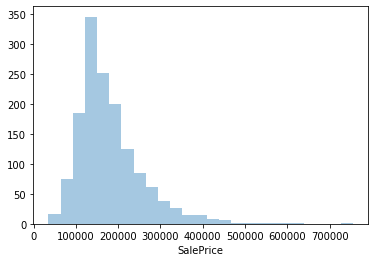

In [38]:
# First, let's look at the target variable. It's clearly right skewed with outliers, a log transformation may help
sns.distplot(train_df['SalePrice'], kde=False, bins=25);

In [39]:
# Log transformation will help correct the right skew and make the data more normal
train_df['SalePrice'] = train_df['SalePrice'].apply(lambda x: np.log(x))

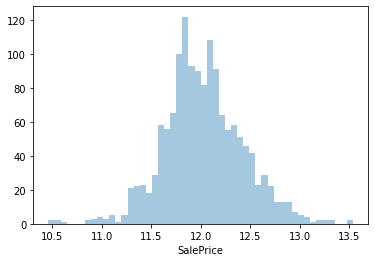

In [40]:
# Looks pretty good, but we should calculate for outliers
sns.distplot(train_df['SalePrice'], kde=False, bins=50);

In [41]:
# There still appears to be some outliers, but not many and they aren't too extreme
mean = np.mean(train_df['SalePrice'])
std = np.std(train_df['SalePrice'])
lower_limit = mean - 3*std
upper_limit = mean + 3*std

print(upper_limit)
print("____")
print(train_df['SalePrice'][train_df['SalePrice'] > upper_limit])
print('\n')
print(lower_limit)
print('____')
print(train_df['SalePrice'][train_df['SalePrice'] < lower_limit])

13.221996039840482
____
440     13.226723
691     13.534473
803     13.275828
898     13.323927
1046    13.229568
1169    13.345507
1182    13.521139
Name: SalePrice, dtype: float64


10.826105762378264
____
30     10.596635
495    10.460242
533    10.578980
916    10.471950
968    10.542706
Name: SalePrice, dtype: float64


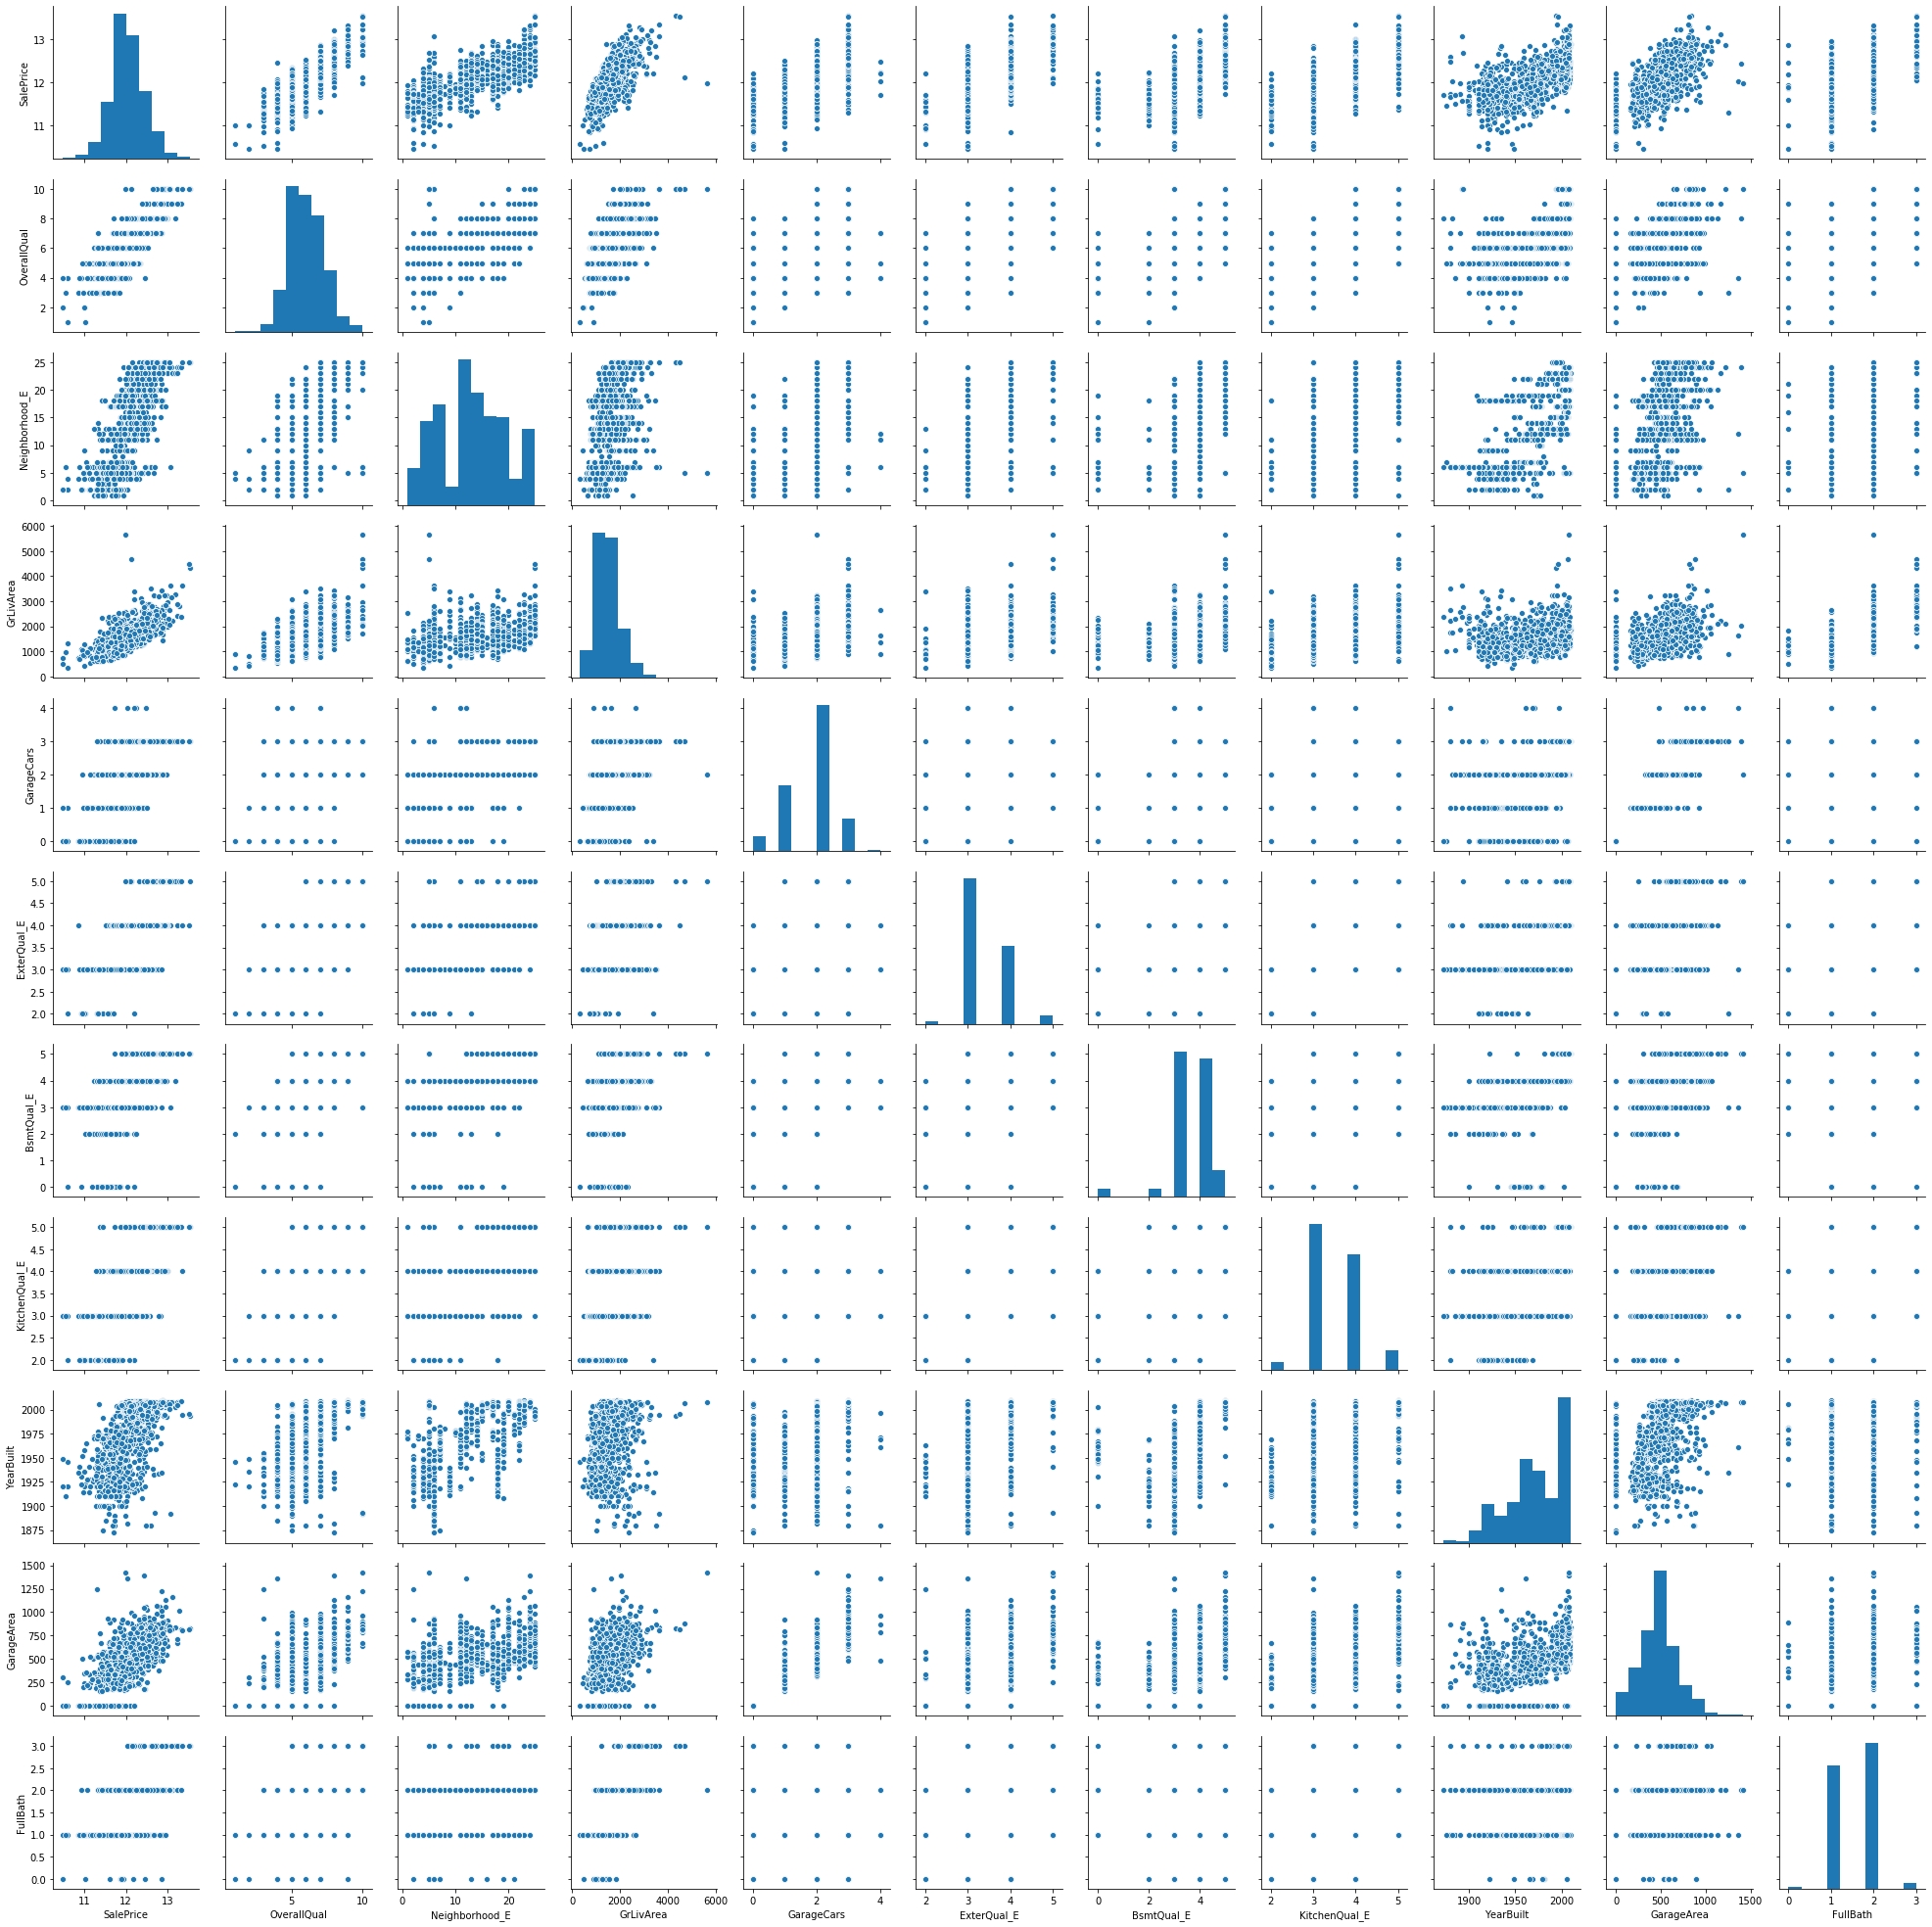

In [42]:
# To quickly look at the correlation matrix pairplot for the SalePrice and top correlated numerical features
sns.pairplot(train_df[top_ten]);

In [43]:
# There appears to be a few obvious values that are outliers, dropping them looks much better
train_df.drop(train_df[train_df['GrLivArea'] > 4500].index, inplace=True)

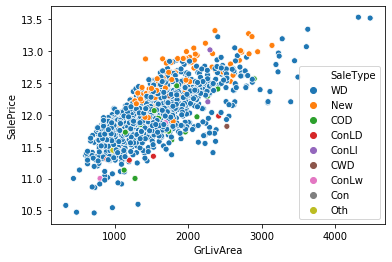

In [44]:
sns.scatterplot(train_df['GrLivArea'], train_df['SalePrice'], hue=train_df['SaleType']);

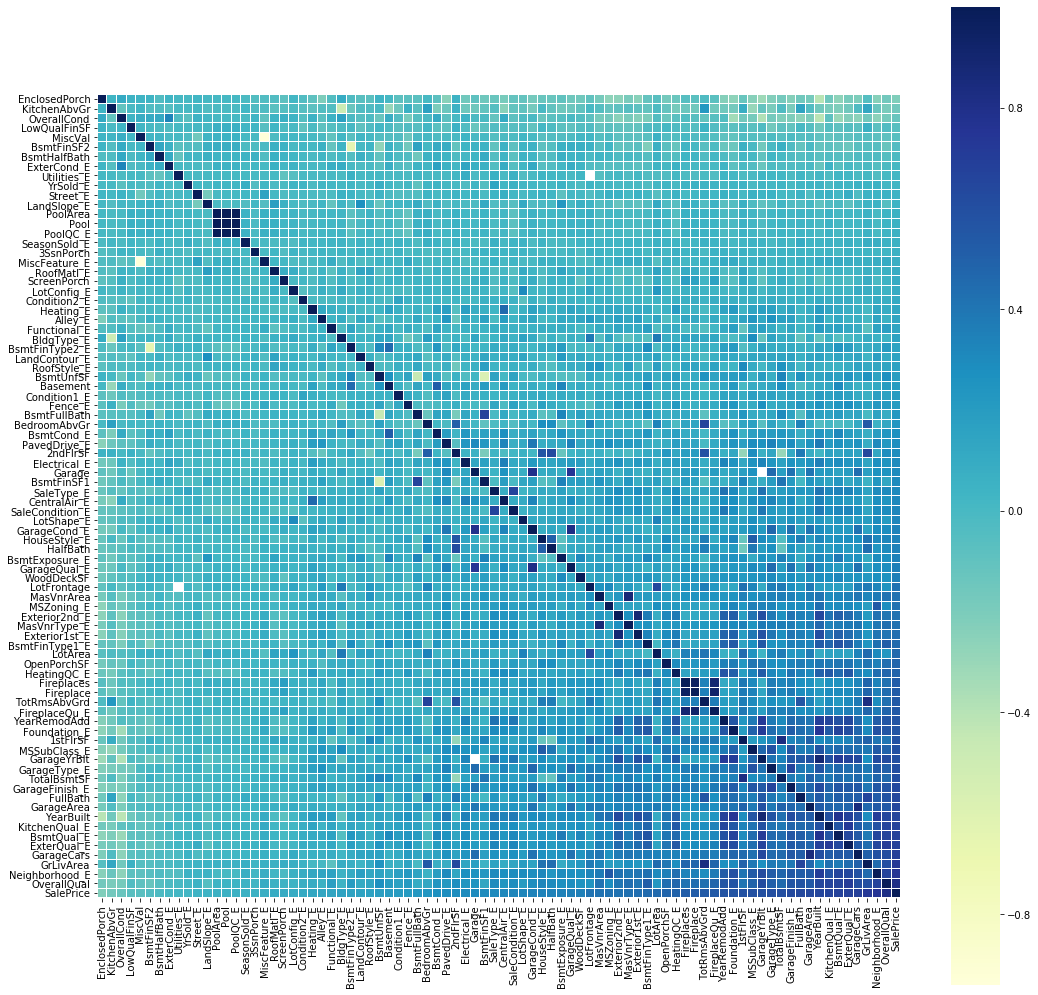

In [45]:
# Let's redo the correlation matrix, but this time as a heatmap
# This will only be for the numerical features (including the encoded features)
corr_matrix = train_df.corr(method='spearman')
corr_matrix.sort_values('SalePrice', axis=0, ascending=True, inplace=True)
corr_matrix.sort_values('SalePrice', axis=1, ascending=True, inplace=True)

plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, cmap='YlGnBu', linewidth=0.01, linecolor='white', square=True, 
            xticklabels=True, yticklabels=True);

In [46]:
# Let's quickly combine the training and test sets to explore the data a little more
exploration = pd.concat([train_df.drop(columns=['SalePrice']), test_df], ignore_index=True)
numerical_variables = exploration.select_dtypes(np.number).columns
# Add LotFrontage to the end of the list again to make the numerical variables easier to plot
numerical_variables = numerical_variables.insert(79, 'LotFrontage')

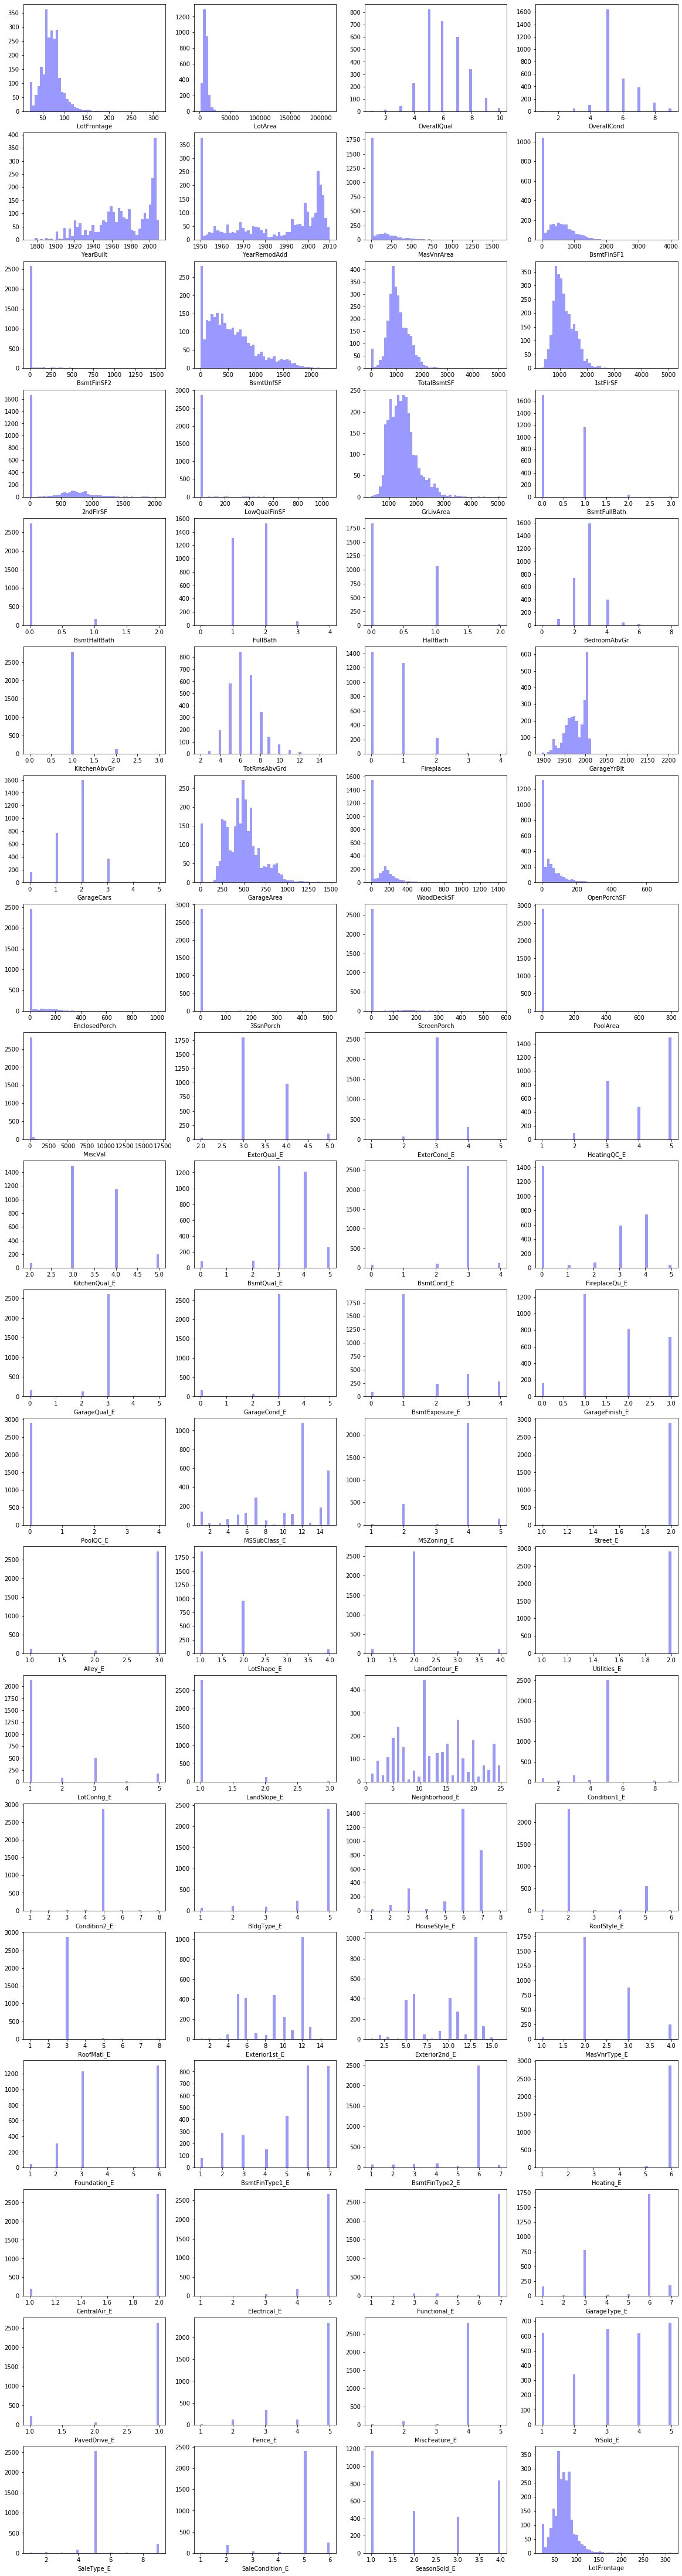

In [47]:
fig, axis = plt.subplots(20, 4, figsize=(20, 80))

i = 0
for r in range(20):
    for c in range(4):
        sns.distplot(exploration[numerical_variables[i]], kde=False, bins=50, color=['b'], ax=axis[r, c])
        i += 1

### Findings

Many of the distributions are right skewed and will need either a log or boxcox transformation later. The year based features are left skewed, but I may leave that as is. 

Many of these distributions seem to have possible outliers. Outliers in the test set could be capped or changed in some way, but since I'm only dropping outliers I won't explore the test set further. That being said, there appears to be an outright incorrect value in the GarageYrBlt feature that I will change, seeing as we aren't in the 2200s. 

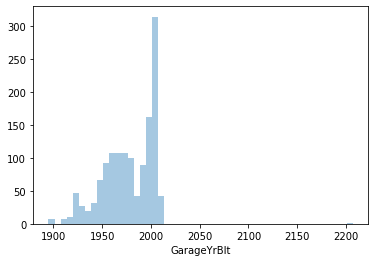

In [48]:
sns.distplot(test_df['GarageYrBlt'][test_df['GarageYrBlt'].isna() != True], kde=False, bins=50);

In [49]:
# Looks like the Garage Year Built value was entered as 2207.0, this is an obvious typo 
test_df.at[1132, 'GarageYrBlt'] = 2007.0

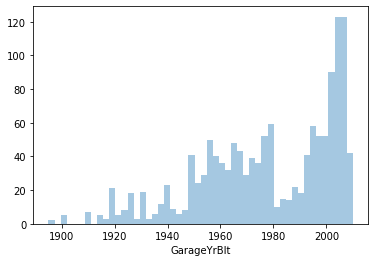

In [50]:
# This looks much better
sns.distplot(test_df['GarageYrBlt'][test_df['GarageYrBlt'].isna() != True], kde=False, bins=50);

#### Exploring the potential outliers

In [51]:
# These four values are drastically above the rest of the distribution
train_df['LotArea'][train_df["LotArea"] > 75000]

249    159000
313    215245
335    164660
706    115149
Name: LotArea, dtype: int64

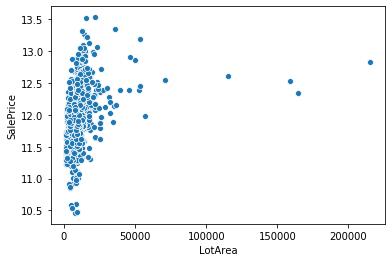

In [52]:
sns.scatterplot(train_df['LotArea'], train_df['SalePrice']);

In [53]:
# This one value is drastically above the rest of the distribution
train_df['LotFrontage'][train_df['LotFrontage'] > 200]

934    313.0
Name: LotFrontage, dtype: float64

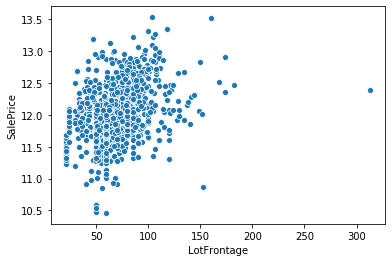

In [54]:
sns.scatterplot(train_df['LotFrontage'], train_df['SalePrice']);

In [55]:
# Another significant outlier
train_df['BsmtFinSF2'][train_df['BsmtFinSF2'] > 1200]

322    1474
Name: BsmtFinSF2, dtype: int64

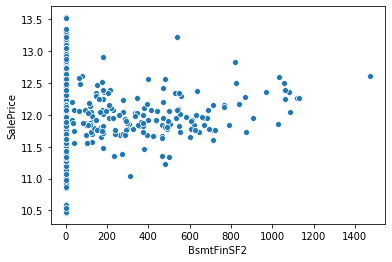

In [56]:
sns.scatterplot(train_df['BsmtFinSF2'], train_df['SalePrice']);

In [57]:
# Three more
train_df['MiscVal'][train_df['MiscVal'] > 3000]

346     15500
705      3500
1230     8300
Name: MiscVal, dtype: int64

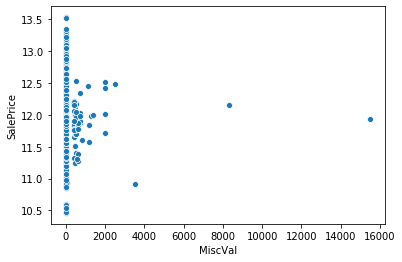

In [58]:
sns.scatterplot(train_df['MiscVal'], train_df['SalePrice']);

In [59]:
# There may be other outliers but these nine are a decent start, for now I will drop them
outliers = [249, 313, 322, 335, 346, 705, 706, 934, 1230]
train_df.drop(index=outliers, inplace=True)

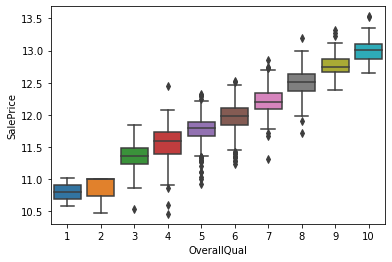

In [60]:
# I thought this plot looked neat 
sns.boxplot(train_df['OverallQual'], train_df['SalePrice']);

# Data Preprocessing

In [61]:
y_train = train_df.pop('SalePrice')
y_train.reset_index(drop=True, inplace=True)

In [62]:
# Combine the train and test features 
x = pd.concat([train_df, test_df], ignore_index=True)

## Data Cleaning

#### Imputation - Filling Missing Values

In [63]:
# LotFrontage - Missing 486 int values, median imputation
lotfrontage_fill = x.groupby(['Neighborhood'])['LotFrontage'].transform('median')
x['LotFrontage'].fillna(lotfrontage_fill, inplace=True)

In [64]:
# GarageYrBlt - Missing 159 int values, median imputation
garageyrblt_fill = x.groupby(['Neighborhood'])['GarageYrBlt'].transform('median')
x['GarageYrBlt'].fillna(garageyrblt_fill, inplace=True)

In [65]:
# MasVnrType and MasVnrType_E - Missing 24 Categorical and Numerical values, mode and median imputation
masvnrtype_fill = x['MasVnrType'].mode()
masvnrtype_e_fill = x.groupby(['Neighborhood'])['MasVnrType_E'].transform('median')

x['MasVnrType'].fillna(masvnrtype_fill[0], inplace=True)
x['MasVnrType_E'].fillna(masvnrtype_e_fill, inplace=True)

In [66]:
# MasVnrArea - Missing 23 int values, median imputation
masvnrarea_fill = x.groupby(['Neighborhood'])['MasVnrArea'].transform('median')
x['MasVnrArea'].fillna(masvnrarea_fill, inplace=True)

In [67]:
# MSZoning and MSZoning_E - Missing 4 Categorical and Numerical values, mode and median imputation
mszoning_fill = x['MSZoning'].mode()
mszoning_e_fill = x.groupby(['Neighborhood'])['MSZoning_E'].transform('median')

x['MSZoning'].fillna(mszoning_fill[0], inplace=True)
x['MSZoning_E'].fillna(mszoning_e_fill, inplace=True)

In [68]:
# For any additional missing values
additional_modes = x.mode()
additional_medians = x.median()

categorical_features = x.select_dtypes(include=['category', 'object']).columns
numerical_features = x.select_dtypes(include=np.number).columns

for feature in categorical_features:
    x[feature].fillna(additional_modes[feature][0], inplace=True)
    
for feature in numerical_features:
    x[feature].fillna(additional_modes[feature][0], inplace=True)

In [69]:
# All missing values have been filled
x.isnull().sum()[(x.isnull().sum() > 0) == True].sort_values(ascending=False)

Series([], dtype: int64)

In [70]:
x.shape

(2908, 117)

## Feature Engineering

In [71]:
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore

#### Feature Creation

In [72]:
x['2ndFloor'] = x['2ndFlrSF'] > 0

x['TotalBath'] = x['BsmtFullBath'] + (0.5*x['BsmtHalfBath']) + \
                    x['FullBath'] + (0.5 * x['HalfBath'])

x['TotalHouseSF'] = x['TotalBsmtSF'] + x['GrLivArea'] + x['GarageArea']

x['TotalAmenitiesSF'] = x['WoodDeckSF'] + x['OpenPorchSF'] + x['ScreenPorch'] + \
                        x['3SsnPorch'] + x['PoolArea'] + x['MasVnrArea'] + x['LotFrontage']

x['YearBltRemod'] = x['YearBuilt'] + x['YearRemodAdd']

x['TotalQuality'] = x['OverallQual'] + x['ExterQual_E'] + x['HeatingQC_E'] + \
                    x['KitchenQual_E'] + x['BsmtQual_E'] + x['GarageQual_E']

x['GarageAreaCar'] = x['GarageArea'] * x['GarageCars']

x['LivingAreaRooms'] = x['GrLivArea'] * x['TotRmsAbvGrd']

x['HasMasVnr'] = x['MasVnrArea'] > 0

x['Remodeled'] = x['YearRemodAdd'] != x['YearBuilt']

x['RecentRemod'] = x['YearRemodAdd'] == x['YrSold']

x['NewHouse'] = x['YearBuilt'] == x['YrSold']

#### Feature Transformations - Handling Skew

In [ ]:
# I'll use a boxcox transformation on features with a skew of more than 0.75 which is highly skewed
num_skew = x.skew(numeric_only=True).abs()
features = num_skew[num_skew > 0.75].index
for feature in features:
    x[feature] = boxcox1p(x[feature], boxcox_normmax(x[feature] + 1))

#### Scale The Data

In [74]:
# Scaling numerical features
num_features = x.select_dtypes(np.number).columns
scaler = RobustScaler()
x[num_features] = scaler.fit_transform(x[num_features])

#### Encoding - Dummy Variables

In [75]:
# Create dummy variables for the categorical variables
x = pd.get_dummies(x)

In [76]:
# Dropping the redundant NO category features
x.drop(columns=['BsmtFinType1_NO', 'BsmtFinType2_NO', 'GarageType_NO'], inplace=True)

In [77]:
x.shape

(2908, 322)

#### Feature Selection

In [78]:
# Many features that have all or nearly all the values in one class. These sparse features can be dropped.
sparse_features = []
for feature in x:
    values = x[feature].value_counts().values
    for value in values:
        if value > (len(x) * .999): 
            sparse_features.append(feature)

In [79]:
x = x.drop(columns=sparse_features)

In [80]:
x.shape

(2908, 301)

#### Splitting The Data

In [81]:
x_train = x.iloc[:len(y_train)]
x_test = x.iloc[len(y_train):]

In [82]:
x_train.shape, x_test.shape, y_train.shape

((1449, 301), (1459, 301), (1449,))

#### Outlier Detection

In [83]:
# Training a linear model on the training set to then make predictions on the training set
# Predicted values that are more than three standard deviations away from the true price are considered outliers
residuals = y_train - LinearRegression().fit(x_train, y_train).predict(x_train)
outliers = residuals[np.abs(zscore(residuals)) > 3].index

In [84]:
outliers

Int64Index([  30,   88,  426,  457,  490,  554,  582,  626,  682,  720,  795,
             866,  959,  961, 1313, 1421, 1442],
           dtype='int64')

In [85]:
x_train = x_train.drop(index=outliers)
y_train = y_train.drop(index=outliers)

# Model Selection
This is a supervised learning regression problem with a small dataset, therefore deep learning algorithms will not be used. 

The models I will try are:

    - Ridge Regression
    - Lasso Regression
    - ElasticNet Regression
    - Support Vector Regressor
    - Light Gradient Boosting Machine Regressor
    - Gradient Boosting Machine Regressor
    - XGBoost Regressor
    
After the models have been trained, I will also train a Stacking Regressor. This uses a meta-regressor trained on the predictions of the original regression models in order to make final predictions on the data. 

# Training | Tuning | Metrics

In [86]:
# Models
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor

# Tuning
from sklearn.model_selection import KFold, RandomizedSearchCV
from multiprocessing import cpu_count

# Metrics
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

In [87]:
# Define the number of K-Folds and the Root Mean Squared Error to make a scorer for training
kf = KFold(n_splits=5, random_state=0, shuffle=True)
rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))
scorer = make_scorer(rmse, greater_is_better=False)

In [92]:
# Function to set up the Randomized Search CV to perform hyperparameter tuning on each model
def random_search(model, grid, n_iter=100):
    n_jobs = max(cpu_count() - 2, 1)
    search = RandomizedSearchCV(model, grid, n_iter=n_iter, n_jobs=n_jobs, scoring=scorer, 
                                cv=kf, random_state=0, verbose=True)
    return search.fit(x_train, y_train)

In [ ]:
# I could of done more training if I had more compute power, this was the best I currently got

ridge_search = random_search(Ridge(max_iter=10000), 
                             {"alpha": [32.585624761532266]})  # np.logspace(-1, 2, 500)})

lasso_search = random_search(Lasso(max_iter=10000), 
                             {"alpha": [0.0006217090286163827]})  # np.logspace(-5, 0, 500)})

elastic_search = random_search(ElasticNet(max_iter=10000), 
                               {"alpha": [0.001],  #np.logspace(-5, 1, 100), 
                                "l1_ratio": [0.6444444444444444]})  # np.linspace(0.6, 1, 10)})

svr_search = random_search(SVR(max_iter=10000), 
                           {"C": [100.0],  # np.linspace(1, 100, 10), 
                            "gamma": [1e-05],  # np.linspace(0.00001, 0.01, 10), 
                            "epsilon": [0.085]})  # np.linspace(0.001, 0.1, 100)})

lgbm_search = random_search(LGBMRegressor(n_estimators=5000, max_depth=3), 
                            {"learning_rate": [0.004641588833612777],  # np.logspace(-3, -1, 10),
                             "subsample": [0.4],  # np.linspace(0.2, 1, 5), 
                             "colsample_bytree": [0.2],  # np.linspace(0.2, 0.7, 6),
                             "reg_alpha": [0.0021544346900318843]})  # np.logspace(-3, 0, 10)})

gbm_search = random_search(GradientBoostingRegressor(n_estimators=5000, loss='huber', max_depth=3), 
                           {"learning_rate": [0.004641588833612777],  # np.logspace(-3, -1, 10),
                            "subsample": [0.2],  # np.linspace(0.2, 1, 5), 
                            "min_samples_split": [6],  # np.linspace(2, 6, 3).astype('int'),
                            "min_samples_leaf": [3],  # np.linspace(1, 5, 3).astype('int'),
                            "max_features": [0.3]})  # np.linspace(0.2, 0.7, 6)})

xgboost_search = random_search(XGBRegressor(n_estimators=5000, max_depth=3), 
                               {'learning_rate': [0.01291549665014884],  # np.logspace(-3, -1, 10),
                                'subsample': [0.6000000000000001],  # np.linspace(0.2, 1, 5),
                                'colsample_bytree': [0.3],  # np.linspace(0.2, 0.7, 6),
                                'reg_alpha': [0.004641588833612777]})  # np.logspace(-3, 0, 10)})

In [90]:
# Save the best estimator from each model search
# I removed the svr_search and lbgm_search since they had worse performance on the final test set
models = [search.best_estimator_ for search in [ridge_search, lasso_search, elastic_search,
                                                gbm_search, xgboost_search]]

for model in models:
    print(model)

Ridge(alpha=32.585624761532266, max_iter=10000)
Lasso(alpha=0.0006217090286163827, max_iter=10000)
ElasticNet(alpha=0.001, l1_ratio=0.6444444444444444, max_iter=10000)
GradientBoostingRegressor(learning_rate=0.004641588833612777, loss='huber',
                          max_features=0.3, min_samples_leaf=3,
                          min_samples_split=6, n_estimators=5000,
                          subsample=0.2)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01291549665014884, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0.004641588833612777, reg_lambda=1, scale_pos_weight=1,
             subsample=0.6000000000000001, tree_method='exact',
   

In [99]:
# Look at the R Squared and RMSE for each model on the training set
for model in models:
    model_pred = model.predict(x_train)
    model_r2 = r2_score(y_train, model_pred)
    model_rmse = np.sqrt(mean_squared_error(y_train, model_pred))
    print(f"{type(model).__name__}\n\tR Squared: {model_r2}\tRMSE: {model_rmse}")

Ridge
	R Squared: 0.953618327786235	RMSE: 0.08357397661402075
Lasso
	R Squared: 0.9508163136632324	RMSE: 0.08606139950122674
ElasticNet
	R Squared: 0.9504568286461035	RMSE: 0.08637533955265018
GradientBoostingRegressor
	R Squared: 0.9755971824923698	RMSE: 0.0606202680140483
XGBRegressor
	R Squared: 0.9939374180961357	RMSE: 0.030215283642735104


In [102]:
# Remade the random search function from above because StackingCVRegressor requires arrays to train properly
def random_stack_search(model, grid, n_iter=100):
    n_jobs = max(cpu_count() - 2, 1)
    search = RandomizedSearchCV(model, grid, n_iter=n_iter, scoring=scorer, n_jobs=n_jobs, 
                                cv=kf, random_state=0, verbose=True)    
    return search.fit(np.array(x_train), np.array(y_train))

In [ ]:
# Used a Ridge Regressor as the meta-regressor, but a different model could have also been used
stack_search = random_stack_search(StackingCVRegressor(models, Ridge(), cv=kf), 
                                 {"meta_regressor__alpha": [0.85]}, n_iter=1) # np.logspace(-0.5, 0.5, 20)

In [104]:
stack_search.cv_results_

{'mean_fit_time': array([164.44784379]),
 'std_fit_time': array([14.08212408]),
 'mean_score_time': array([0.05079613]),
 'std_score_time': array([0.00553284]),
 'param_meta_regressor__alpha': masked_array(data=[0.85],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'meta_regressor__alpha': 0.85}],
 'split0_test_score': array([-0.08394726]),
 'split1_test_score': array([-0.10252401]),
 'split2_test_score': array([-0.09448248]),
 'split3_test_score': array([-0.08670024]),
 'split4_test_score': array([-0.08668812]),
 'mean_test_score': array([-0.09086842]),
 'std_test_score': array([0.00680684]),
 'rank_test_score': array([1])}

In [105]:
stack_search.best_params_

{'meta_regressor__alpha': 0.85}

In [106]:
# Final Model
stack_model = stack_search.best_estimator_

# Present | Launch | Maintain

In [107]:
# Using the stack model to predict the training set to visualize how well it performed
stack_pred_train = stack_model.predict(np.array(x_train))

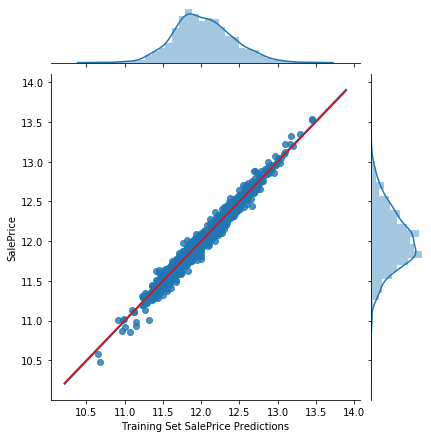

In [118]:
# The red line represents perfect predictions
# It's hard to see, but the blue line of best fit for the model is almost completely covered by the red 
g = sns.jointplot(x=stack_pred_train, y=y_train, kind='reg');

plt.xlabel('Training Set SalePrice Predictions')
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, '-r');

In [114]:
# Make final predictions on the test set with the best stack model 
stack_pred = stack_model.predict(np.array(x_test))
stack_pred

array([11.7284467 , 11.96513061, 12.1324218 , ..., 12.04365781,
       11.67417065, 12.27028968])

In [115]:
# Make the final submission dataframe - using exp on the predictions since I log transformed the sale price before
submission = pd.DataFrame({"Id": test_id, "SalePrice": np.exp(stack_pred)})

In [116]:
submission.to_csv('kaggle_housing/final.csv', index=False)